<a href="https://colab.research.google.com/github/caioitalo/soulcode/blob/main/Mkt_campaign_Atividade_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXTRAÇÃO DE DADOS

In [1]:
#baixando a biblioteca pandera
!pip install pandera



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 122 kB 4.1 MB/s 


In [3]:
#importando as bibliotecas
import pandas as pd
import pandera as pa
import numpy as np

In [35]:
# lendo o DF a partir de um Dataset hospedado em um bucket na GCP
df = pd.read_csv('https://storage.googleapis.com/datalake-soulcode-ed7/arquivos%20soulcode/marketing_campaign.csv%20-%20marketing_campaign.csv.csv', sep=',')

In [36]:
#criando um backup antes de tratar 
df2 = df.copy()

In [ ]:
df

In [ ]:
df.dtypes

ano_nasc                    object
escolaridade                object
estado_civil                object
renda_anual                float64
filhos_crianca               int64
filhos_adolesc               int64
cliente_desde       datetime64[ns]
ultima_compra                int64
compra_vinhos                int64
compra_frutas                int64
compra_carnes                int64
compra_peixes                int64
compra_doces                 int64
compra_ouro_prod             int64
compras_acordo               int64
compras_web                  int64
compras_catalogo             int64
compras_loja                 int64
site_visita_mes              int64
reclamacoes                  int64
tot_filhos                   int64
dtype: object

#TRANSFORMAÇÃO DOS DADOS

In [37]:
# renomeando as colunas
df.rename(columns={'ID':'id','Year_Birth':'ano_nasc','Education':'escolaridade','Marital_Status':'estado_civil','Income':'renda_anual',
                   'Kidhome':'filhos_crianca','Teenhome':'filhos_adolesc','Dt_Customer':'cliente_desde','Recency':'ultima_compra','MntWines':'compra_vinhos',
                   'MntFruits':'compra_frutas','MntMeatProducts':'compra_carnes','MntFishProducts':'compra_peixes','MntSweetProducts':'compra_doces',
                   'MntGoldProds':'compra_ouro_prod','NumDealsPurchases':'compras_acordo','NumWebPurchases':'compras_web',
                   'NumCatalogPurchases':'compras_catalogo','NumStorePurchases':'compras_loja','AcceptedCmp1':'cmp1_aceito','AcceptedCmp2':'cmp2_aceito',
                   'AcceptedCmp3':'cmp3_aceito','AcceptedCmp4':'cmp4_aceito','AcceptedCmp5':'cmp5_aceito','Complain':'reclamacoes',
                   'Z_CostContact':'custo_contrato','Z_Revenue':'receita','Response':'resposta','NumWebVisitsMonth':'site_visita_mes'},inplace=True)

In [7]:
#checando dados vazios
df.isna().sum()

id                   0
ano_nasc             0
escolaridade         0
estado_civil         0
renda_anual         24
filhos_crianca       0
filhos_adolesc       0
cliente_desde        0
ultima_compra        0
compra_vinhos        0
compra_frutas        0
compra_carnes        0
compra_peixes        0
compra_doces         0
compra_ouro_prod     0
compras_acordo       0
compras_web          0
compras_catalogo     0
compras_loja         0
site_visita_mes      0
cmp3_aceito          0
cmp4_aceito          0
cmp5_aceito          0
cmp1_aceito          0
cmp2_aceito          0
reclamacoes          0
custo_contrato       0
receita              0
resposta             0
dtype: int64

In [38]:
# setando coluna id como rótulo e verificando se ela é única
df.set_index(['id'], verify_integrity=True, inplace=True)

In [39]:
#transformando a coluna cliente_desde para o tipo data
df['cliente_desde'] = pd.to_datetime(df['cliente_desde'],dayfirst=True)

In [40]:
# dropando custo_contrato e receita que possuem os mesmos valores, portanto não contribuem para nenhuma análise
df.drop(['custo_contrato', 'receita','resposta'],axis=1,inplace=True)


In [41]:
# checando inconsistências
# inconsistências encontradas: nasc (1893, 1899, 1900), estado_civil: alone, absurd, YOLO
# receita e custo do contrato têm sempre os mesmos valores -> drop
df.groupby(['estado_civil'],dropna=False).size().sort_values(ascending=False)

estado_civil
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
dtype: int64

In [42]:
# traduzindo os elementos das colunas
# o replace das datas são inconsistentes pois é improvável pessoas com 120+ comprando na web. provável digitação errada/outliers
# YOLO e absurd, alone não tem como definir

df['escolaridade'] = df['escolaridade'].replace({'Graduation':'Graduado','Master':'Mestre','2n Cycle':'2º Ciclo','Basic':'Básico'})
df['estado_civil'] = df['estado_civil'].replace({'Married':'Casado', 'Together':'Amasiado', 'Single':'Solteiro','Divorced':'Divorciado',
                                                 'Widow':'Viúvo(a)'})

In [ ]:
# checando linhas para verificar inconsistências do estado civil
ftyolo = df['estado_civil'] == 'YOLO'
ftabs = df['estado_civil'] == 'Absurd'
ftalo = df['estado_civil'] == 'Alone'

df[ftyolo | ftabs | ftalo]

In [44]:
# checagem de cliente nascido em 1893, pois em 2014 (provável ano do dataset) ele já teria cerca de 121
# o que parece forte indícios de inconsistência. No caso, ainda avisar ao time quanto às linhas dos clientes nascidos em 1899 e 1900.
ft1893 = df['ano_nasc'] == 1893
df[ft1893]


,ano_nasc,escolaridade,estado_civil,renda_anual,filhos_crianca,filhos_adolesc,cliente_desde,ultima_compra,compra_vinhos,compra_frutas,...,compras_web,compras_catalogo,compras_loja,site_visita_mes,cmp3_aceito,cmp4_aceito,cmp5_aceito,cmp1_aceito,cmp2_aceito,reclamacoes
id,,,,,,,,,,,,,,,,,,,,,
11004,1893,2º Ciclo,Solteiro,60182.0,0,1,2014-05-17,23,8,0,...,1,0,2,4,0,0,0,0,0,0


In [45]:
# dropar as linhas correspondentes por serem em pouca qtd (p < 0.02) e corresponderem a dados inconsistentes, inclusive com linhas iguais
df.drop([433, 7660, 92, 7734, 4369, 492, 11133, 11004],inplace=True)

In [46]:
# fazendo uma coluna com o total de filhos
df['tot_filhos'] = df['filhos_crianca'] + df['filhos_adolesc']

In [47]:
df.dtypes

ano_nasc                     int64
escolaridade                object
estado_civil                object
renda_anual                float64
filhos_crianca               int64
filhos_adolesc               int64
cliente_desde       datetime64[ns]
ultima_compra                int64
compra_vinhos                int64
compra_frutas                int64
compra_carnes                int64
compra_peixes                int64
compra_doces                 int64
compra_ouro_prod             int64
compras_acordo               int64
compras_web                  int64
compras_catalogo             int64
compras_loja                 int64
site_visita_mes              int64
cmp3_aceito                  int64
cmp4_aceito                  int64
cmp5_aceito                  int64
cmp1_aceito                  int64
cmp2_aceito                  int64
reclamacoes                  int64
tot_filhos                   int64
dtype: object

In [48]:
#criando um esquema de validação de dados
schema = pa.DataFrameSchema({
    'ano_nasc':pa.Column(int, nullable=True),
    'escolaridade': pa.Column(str),
    'estado_civil': pa.Column(str, nullable=True),
    'renda_anual': pa.Column(float, nullable=True),
    'filhos_crianca': pa.Column(int),
    'filhos_adolesc': pa.Column(int),
    'cliente_desde': pa.Column(pa.DateTime),
    'ultima_compra': pa.Column(int),
    'compra_vinhos': pa.Column(int),
    'compra_frutas':pa.Column(int),
    'compra_carnes':pa.Column(int),
    'compra_peixes':pa.Column(int),
    'compra_doces':pa.Column(int),
    'compra_ouro_prod':pa.Column(int),
    'compras_acordo':pa.Column(int),
    'compras_web':pa.Column(int),
    'compras_catalogo':pa.Column(int),
    'compras_loja':pa.Column(int),
    'site_visita_mes':pa.Column(int),
    'reclamacoes':pa.Column(int),
    'cmp1_aceito':pa.Column(int),
    'cmp2_aceito':pa.Column(int),
    'cmp3_aceito':pa.Column(int),
    'cmp4_aceito':pa.Column(int),
    'cmp5_aceito':pa.Column(int),
    'tot_filhos':pa.Column(int)
    }
)


In [49]:
# checando a validação dos dados
schema.validate(df)

,ano_nasc,escolaridade,estado_civil,renda_anual,filhos_crianca,filhos_adolesc,cliente_desde,ultima_compra,compra_vinhos,compra_frutas,...,compras_catalogo,compras_loja,site_visita_mes,cmp3_aceito,cmp4_aceito,cmp5_aceito,cmp1_aceito,cmp2_aceito,reclamacoes,tot_filhos
id,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduado,Solteiro,58138.0,0,0,2012-09-04,58,635,88,...,10,4,7,0,0,0,0,0,0,0
2174,1954,Graduado,Solteiro,46344.0,1,1,2014-03-08,38,11,1,...,1,2,5,0,0,0,0,0,0,2
4141,1965,Graduado,Amasiado,71613.0,0,0,2013-08-21,26,426,49,...,2,10,4,0,0,0,0,0,0,0
6182,1984,Graduado,Amasiado,26646.0,1,0,2014-02-10,26,11,4,...,0,4,6,0,0,0,0,0,0,1
5324,1981,PhD,Casado,58293.0,1,0,2014-01-19,94,173,43,...,3,6,5,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10870,1967,Graduado,Casado,61223.0,0,1,2013-06-13,46,709,43,...,3,4,5,0,0,0,0,0,0,1
4001,1946,PhD,Amasiado,64014.0,2,1,2014-06-10,56,406,0,...,2,5,7,0,0,0,1,0,0,3
7270,1981,Graduado,Divorciado,56981.0,0,0,2014-01-25,91,908,48,...,3,13,6,0,1,0,0,0,0,0


In [52]:
df.dtypes

ano_nasc                     int64
escolaridade                object
estado_civil                object
renda_anual                float64
filhos_crianca               int64
filhos_adolesc               int64
tot_filhos                   int64
cliente_desde       datetime64[ns]
ultima_compra                int64
site_visita_mes              int64
compra_vinhos                int64
compra_frutas                int64
compra_carnes                int64
compra_peixes                int64
compra_doces                 int64
compra_ouro_prod             int64
compras_acordo               int64
compras_web                  int64
compras_catalogo             int64
compras_loja                 int64
cmp1_aceito                  int64
cmp2_aceito                  int64
cmp3_aceito                  int64
cmp4_aceito                  int64
cmp5_aceito                  int64
reclamacoes                  int64
dtype: object

In [51]:
# trocando as colunas de lugar para deixar algo mais racional
df = df[['ano_nasc','escolaridade','estado_civil','renda_anual','filhos_crianca','filhos_adolesc','tot_filhos','cliente_desde','ultima_compra',
        'site_visita_mes','compra_vinhos','compra_frutas','compra_carnes','compra_peixes','compra_doces','compra_ouro_prod','compras_acordo',
        'compras_web','compras_catalogo','compras_loja','cmp1_aceito','cmp2_aceito','cmp3_aceito','cmp4_aceito','cmp5_aceito','reclamacoes']]

# CARREGAMENTO DOS DADOS

In [53]:
# carregando pra um novo arquivo
df.to_csv('bd_mkt_finalizado.csv')

# ANÁLISES BÁSICAS

In [125]:
df.dtypes

ano_nasc                     int64
escolaridade                object
estado_civil                object
renda_anual                float64
filhos_crianca               int64
filhos_adolesc               int64
tot_filhos                   int64
cliente_desde       datetime64[ns]
ultima_compra                int64
site_visita_mes              int64
compra_vinhos                int64
compra_frutas                int64
compra_carnes                int64
compra_peixes                int64
compra_doces                 int64
compra_ouro_prod             int64
compras_acordo               int64
compras_web                  int64
compras_catalogo             int64
compras_loja                 int64
cmp1_aceito                  int64
cmp2_aceito                  int64
cmp3_aceito                  int64
cmp4_aceito                  int64
cmp5_aceito                  int64
reclamacoes                  int64
dtype: object

## 1) Análise Escolaridade x Gasto em compras (>1000)

In [154]:
# Criando um df diferente com o filtro de clientes com compras maior que 1000
df2 = df.copy()
df2['soma_gasto'] = df['compra_vinhos'] + df['compra_frutas'] + df['compra_carnes'] + df['compra_peixes'] + df['compra_doces'] + df['compra_ouro_prod'] 
ft1000 = df2['soma_gasto'] > 1000
df2 = df2.loc[ft1000]

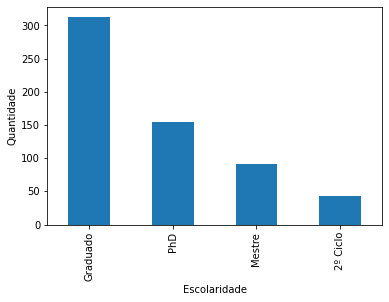

In [157]:
# a plotagem mostra que pessoas de ensino básico não aparecerem
# Graduado aparece com maior número de clientes com esse perfil de gasto
df2.groupby('escolaridade').size().sort_values(ascending=False).plot.bar(xlabel='Escolaridade',ylabel='Quantidade')

## 2) Estado Civil x Compra Vinho

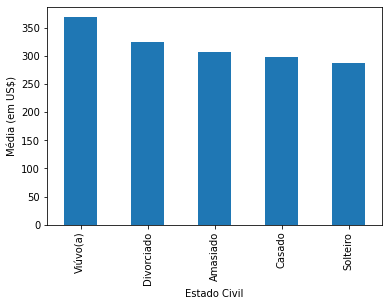

In [174]:
# Pelo gráfico vê-se que os viúvos possuem o maior gasto médio; já os solteiros, o menor.
df['compra_vinhos'].groupby(df['estado_civil']).mean().sort_values(ascending=False).plot.bar(xlabel='Estado Civil',ylabel='Média (em US$)')